In [232]:
#import numpys and pandas
import pandas as pd
import numpy as np

In [233]:
#load dataset
data=pd.read_csv('../dataset/mum-byculla-bmc-2024-25.csv')

In [234]:
data.head()

,Station ID,State,City,Station Name,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,site_5960,Maharashtra,Mumbai,"Byculla, Mumbai - BMC",2024-01-01T00:00:00.000000+0000,31.51,79.10,13.68,33.98,29.26,...,5.60,24.03,86.80,1.09,22.30,0.0,0.0,5.25,NaN,NaN
1,site_5960,Maharashtra,Mumbai,"Byculla, Mumbai - BMC",2024-01-01T00:15:00.000000+0000,41.82,84.42,9.71,33.41,25.77,...,5.63,23.92,87.21,0.97,10.78,0.0,0.0,5.25,NaN,NaN
2,site_5960,Maharashtra,Mumbai,"Byculla, Mumbai - BMC",2024-01-01T00:30:00.000000+0000,41.82,84.42,10.07,32.48,25.58,...,5.59,23.96,88.05,0.89,348.81,0.0,0.0,5.25,NaN,NaN
3,site_5960,Maharashtra,Mumbai,"Byculla, Mumbai - BMC",2024-01-01T00:45:00.000000+0000,41.82,84.42,23.85,31.60,36.17,...,5.94,23.94,89.63,0.79,331.84,0.0,0.0,5.21,NaN,NaN
4,site_5960,Maharashtra,Mumbai,"Byculla, Mumbai - BMC",2024-01-01T01:00:00.000000+0000,41.23,85.08,22.12,30.51,34.22,...,6.08,24.03,90.63,1.19,19.15,0.0,0.0,5.01,NaN,NaN


In [235]:
#to check if timestamp is a string
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70177 entries, 0 to 70176
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Station ID           70177 non-null  object 
 1   State                70176 non-null  object 
 2   City                 70176 non-null  object 
 3   Station Name         70176 non-null  object 
 4   Timestamp            70176 non-null  object 
 5   PM2.5 (µg/m³)        66927 non-null  float64
 6   PM10 (µg/m³)         67034 non-null  float64
 7   NO (µg/m³)           63410 non-null  float64
 8   NO2 (µg/m³)          66891 non-null  float64
 9   NOx (ppb)            67090 non-null  float64
 10  NH3 (µg/m³)          65656 non-null  float64
 11  SO2 (µg/m³)          65139 non-null  float64
 12  CO (mg/m³)           64855 non-null  float64
 13  Ozone (µg/m³)        66595 non-null  float64
 14  Benzene (µg/m³)      67643 non-null  float64
 15  Toluene (µg/m³)      67346 non-null 

In [236]:
#convert timestamp to datetime and filter based on hourly data
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data=data[data['Timestamp'].dt.minute==0].reset_index(drop=True)

In [ ]:
#Select relevant columns
data=data[['Timestamp','PM2.5 (µg/m³)','PM10 (µg/m³)','AT (°C)','RH (%)','WS (m/s)','WD (deg)']]
data.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg)
0,2024-01-01 00:00:00+00:00,31.51,79.10,24.03,86.80,1.09,22.30
1,2024-01-01 01:00:00+00:00,41.23,85.08,24.03,90.63,1.19,19.15
2,2024-01-01 02:00:00+00:00,39.52,89.47,23.97,93.04,1.01,357.19
3,2024-01-01 03:00:00+00:00,52.25,93.20,23.79,95.42,0.99,9.45
4,2024-01-01 04:00:00+00:00,62.91,97.54,23.58,92.07,1.22,15.50


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Timestamp      17544 non-null  datetime64[ns, UTC]
 1   PM2.5 (µg/m³)  16730 non-null  float64            
 2   PM10 (µg/m³)   16759 non-null  float64            
 3   AT (°C)        17174 non-null  float64            
 4   RH (%)         17001 non-null  float64            
 5   WS (m/s)       17127 non-null  float64            
 6   WD (deg)       17045 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 959.6 KB


In [ ]:
#check null values
data.isnull().sum()

Timestamp          0
PM2.5 (µg/m³)    814
PM10 (µg/m³)     785
AT (°C)          370
RH (%)           543
WS (m/s)         417
WD (deg)         499
dtype: int64

In [241]:
# Handle missing values with forward-fill then backward-fill
#forward-fill--> fills missing values with the last known value
data[['PM2.5 (µg/m³)','PM10 (µg/m³)','AT (°C)','RH (%)','WS (m/s)','WD (deg)']]=(data[['PM2.5 (µg/m³)','PM10 (µg/m³)','AT (°C)','RH (%)','WS (m/s)','WD (deg)']].ffill())
data.isnull().sum()

Timestamp        0
PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
AT (°C)          0
RH (%)           0
WS (m/s)         0
WD (deg)         0
dtype: int64

In [ ]:
#create month and hour column
data['month']=data['Timestamp'].dt.month
data['hourofday']=data['Timestamp'].dt.hour
data=data.drop('Timestamp',axis=1)

In [ ]:
#rename Columns for easier access
data[['PM2_5','PM10','temp','humidity']]=data[['PM2.5 (µg/m³)','PM10 (µg/m³)','AT (°C)','RH (%)']]
data=data.drop(['PM2.5 (µg/m³)','PM10 (µg/m³)','AT (°C)','RH (%)'],axis=1)

In [ ]:
#calculate lag values and rolling means for 3 windows
data['PM2_5(lag1)']=data['PM2_5'].shift(1)
data['PM2_5(lag2)']=data['PM2_5'].shift(2)

data['PM10(lag1)']=data['PM10'].shift(1)
data['PM10(lag2)']=data['PM10'].shift(2)

data['PM2_5(rolling_mean_3)']=data['PM2_5'].rolling(window=3).mean()
data['PM10(rolling_mean_3)']=data['PM10'].rolling(window=3).mean()
data.dropna(inplace=True)
data.head()

,WS (m/s),WD (deg),month,hourofday,PM2_5,PM10,temp,humidity,PM2_5(lag1),PM2_5(lag2),PM10(lag1),PM10(lag2),PM2_5(rolling_mean_3),PM10(rolling_mean_3)
2,1.01,357.19,1,2,39.52,89.47,23.97,93.04,41.23,31.51,85.08,79.10,37.420000,84.550000
3,0.99,9.45,1,3,52.25,93.20,23.79,95.42,39.52,41.23,89.47,85.08,44.333333,89.250000
4,1.22,15.50,1,4,62.91,97.54,23.58,92.07,52.25,39.52,93.20,89.47,51.560000,93.403333
5,0.53,16.49,1,5,58.99,96.83,23.81,83.98,62.91,52.25,97.54,93.20,58.050000,95.856667
6,0.65,156.77,1,6,56.62,98.72,24.16,82.82,58.99,62.91,96.83,97.54,59.506667,97.696667


In [ ]:
#breakpoints of PM2.5 and PM10
PM25_BP = [
    (0, 30, 0, 50),
    (31, 60, 51, 100),
    (61, 90, 101, 200),
    (91, 120, 201, 300),
    (121, 250, 301, 400),
    (251, 500, 401, 500)
]

PM10_BP = [
    (0, 50, 0, 50),
    (51, 100, 51, 100),
    (101, 250, 101, 200),
    (251, 350, 201, 300),
    (351, 430, 301, 400),
    (431, 600, 401, 500)
]

In [ ]:
#calculate sub index from raw concentration
def calculate_sub_index(concentration, breakpoints):
    # Handle NaN values
    if pd.isna(concentration):
        return None
    # Find the correct breakpoint (for ex. if concentration is between 0 and 30 than use formula to calculate AQI between 0 and 50)
    for c_low, c_high, i_low, i_high in breakpoints:
        if c_low <= concentration <= c_high:
            # Apply the linear interpolation formula
            return ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
    # If concentration is out of range
    return None

In [ ]:
#Calculate PM-Based AQI
def calculate_aqi(row):
    sub_indices = []

    pm25_aqi = calculate_sub_index(row["PM2_5"], PM25_BP)
    pm10_aqi = calculate_sub_index(row["PM10"], PM10_BP)

    for val in [pm25_aqi, pm10_aqi]:
        if val is not None:
            sub_indices.append(val)

    # Return None if no valid sub-indices were calculated
    return max(sub_indices) if sub_indices else None

In [ ]:
#Calculate target AQI
data["aqi"] = data.apply(calculate_aqi, axis=1)
data['Target_AQI']=data['aqi'].shift(-3)
data=data.drop('aqi',axis=1)
data=data.dropna()
data.head()

,WS (m/s),WD (deg),month,hourofday,PM2_5,PM10,temp,humidity,PM2_5(lag1),PM2_5(lag2),PM10(lag1),PM10(lag2),PM2_5(rolling_mean_3),PM10(rolling_mean_3),Target_AQI
2,1.01,357.19,1,2,39.52,89.47,23.97,93.04,41.23,31.51,85.08,79.10,37.420000,84.550000,98.293448
3,0.99,9.45,1,3,52.25,93.20,23.79,95.42,39.52,41.23,89.47,85.08,44.333333,89.250000,98.720000
4,1.22,15.50,1,4,62.91,97.54,23.58,92.07,52.25,39.52,93.20,89.47,51.560000,93.403333,97.972414
5,0.53,16.49,1,5,58.99,96.83,23.81,83.98,62.91,52.25,97.54,93.20,58.050000,95.856667,109.773448
7,0.28,274.10,1,7,58.80,95.61,23.58,87.97,56.62,58.99,98.72,96.83,58.136667,97.053333,102.687651


In [250]:
#imprt visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Target_AQI', ylabel='Count'>

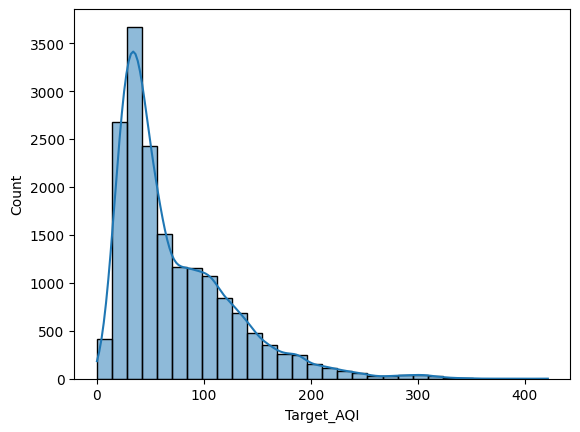

In [251]:
sns.histplot(data['Target_AQI'],bins=30,kde=True)
#Mostly AQI is between 0-100 indicating good to moderate air quality

<Axes: >

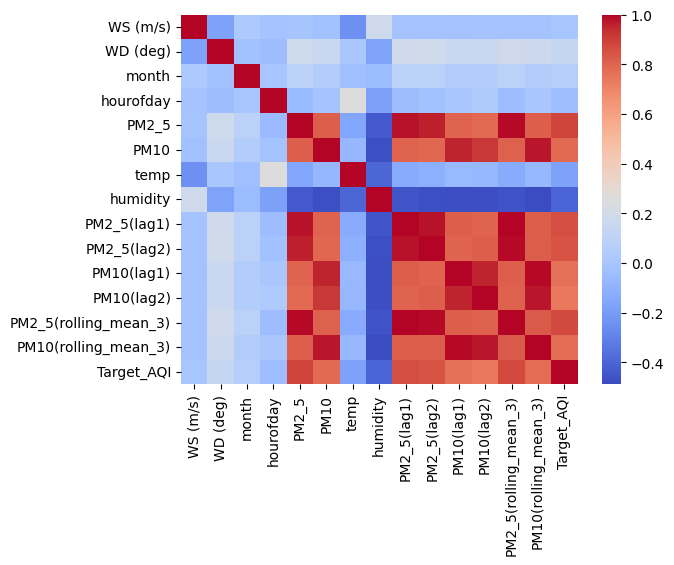

In [252]:
#correlation heatmap
sns.heatmap(data.corr(),cmap='coolwarm')

In [253]:
#correlation is high so random forrest is likely to give better results than linear models

In [255]:
data.columns

Index(['WS (m/s)', 'WD (deg)', 'month', 'hourofday', 'PM2_5', 'PM10', 'temp',
       'humidity', 'PM2_5(lag1)', 'PM2_5(lag2)', 'PM10(lag1)', 'PM10(lag2)',
       'PM2_5(rolling_mean_3)', 'PM10(rolling_mean_3)', 'Target_AQI',
       'Current_AQI'],
      dtype='object')

In [256]:
x=data[['WS (m/s)', 'WD (deg)', 'month', 'hourofday', 'PM2_5', 'PM10', 'temp',
       'humidity', 'PM2_5(lag1)', 'PM2_5(lag2)', 'PM10(lag1)', 'PM10(lag2)',
       'PM2_5(rolling_mean_3)', 'PM10(rolling_mean_3)']]
y=data['Target_AQI']

In [257]:
#import grid search and model libraries
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.pipeline import Pipeline

In [258]:
#train test split(time series split)
split_idx = int(len(x) * 0.8)

X_train, X_test = x.iloc[:split_idx], x.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [259]:
tscv = TimeSeriesSplit(n_splits=5)

In [260]:
#Random Forest Pipeline and Grid
rf_pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])
rf_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 15, 20],
    'rf__min_samples_leaf': [1, 3, 5],
    'rf__min_samples_split': [2, 5]
}

In [261]:
#Grid Search for Random Forest
Grid_rf = GridSearchCV(rf_pipeline, rf_grid, cv=tscv, scoring='neg_mean_absolute_error')
Grid_rf.fit(X_train, y_train)
rf_pred=Grid_rf.predict(X_test)

In [264]:
#metrics
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest R2 Score: {rf_r2}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest R2 Score: 0.8496231504378994
Random Forest MAE: 13.328239395615403
Random Forest RMSE: 21.797329078968357


In [267]:
#Analyze residuals
residuals = y_test - rf_pred
res_df = X_test.copy()
res_df['actual_aqi'] = y_test.values
res_df['predicted_aqi'] = rf_pred
res_df['residual'] = residuals.values

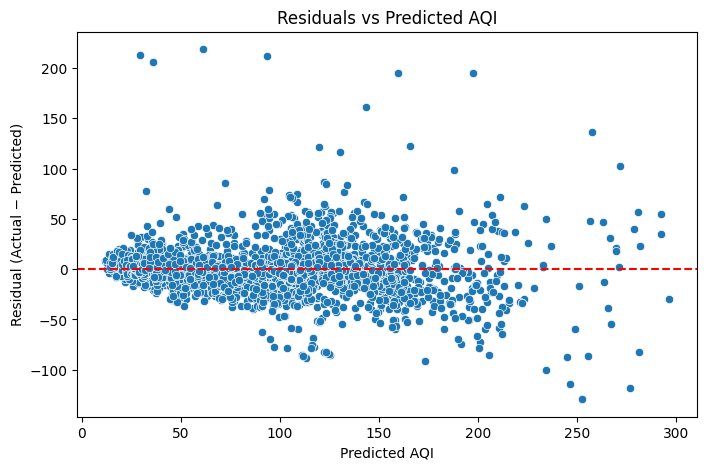

In [268]:
#Plot residuals
plt.figure(figsize=(8,5))
sns.scatterplot(x=res_df['predicted_aqi'], y=res_df['residual'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residuals vs Predicted AQI")
plt.show()


In [269]:
import joblib
rf_model=Grid_rf.best_estimator_
rf_model.fit(x,y)
joblib.dump(rf_model,'../app/rf_aqi_model.pkl')

['../app/rf_aqi_model.pkl']

In [273]:
#Data from 3 hours ago 
sample_input={
   'WS (m/s)':2,
   'WD (deg)':120,
   'month':1,
   'hourofday':9,
   'PM2_5':56.35,
   'PM10':91.41,
   'temp':27,
   'humidity':46,
   'PM2_5(lag1)':41.68,
   'PM2_5(lag2)':38.91,
   'PM10(lag1)':71.79,
   'PM10(lag2)':69.13,
   'PM2_5(rolling_mean_3)':45.64,
   'PM10(rolling_mean_3)':77.43
}
sample=pd.DataFrame([sample_input])

In [274]:
#current data and PM based AQI calculation
pm25=69.4
pm10=126.52
print(calculate_sub_index(pm25,PM25_BP))
print(calculate_sub_index(pm10,PM10_BP))
print("Current AQI is 129.67")

129.67586206896553
117.95624161073826
Current AQI is 129.67


In [ ]:
#prediction
model=joblib.load('../app/rf_aqi_model.pkl')
print(f'{model.predict(sample)[0]:.2f} is predicted live PM-based AQI and 129.67 is actual live PM-based AQI')

116.68 is predicted live PM-based AQI and 129.67 is actual live PM-based AQI
